In [4]:
"""
Here, we are going to attempt to recreate the plots corresponding to the one-point spectra
F11 (and F22 after that) from Syed Mann (2024) Equation 6, since analytical attempts
have flopped every single time.
"""

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

# Verification of methodology

First, we are going to verify that the methodology I think is correct is in fact correct by recreating the
plot in Figure 2 Syed-Mann (2024) "theory" paper.

I have previously recreated this plot with the analytical formula, so I know this can be checked.

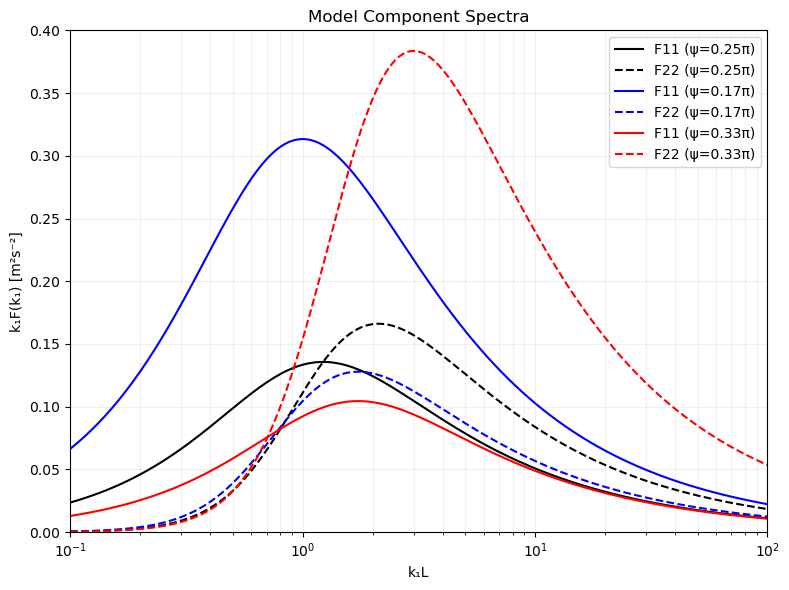

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma


def calculate_rho(k1, L_2D, psi):
    """
    Calculate ρ according to equation (18)

    Args:
        k1: Wavenumber k₁
        L_2D: Length scale L₂ᴰ
        psi: Anisotropy parameter ψ

    Returns:
        ρ = √(1 + 2k₁²L₂ᴰ² cos² ψ)
    """
    return np.sqrt(1 + 2 * (k1 * L_2D) ** 2 * np.cos(psi) ** 2)


def F11_2D(k1, sigma_squared, L_2D, psi):
    """
    Calculate F₁₁²ᴰ according to equation (16)

    Args:
        k1: Wavenumber k₁
        sigma_squared: Variance σ²
        L_2D: Length scale L₂ᴰ
        psi: Anisotropy parameter ψ

    Returns:
        F₁₁²ᴰ(k₁)
    """
    rho = calculate_rho(k1, L_2D, psi)

    # Calculate the spectrum
    F11 = (
        (sigma_squared * L_2D)
        * ((gamma(5 / 6)) / ((2 ** (3 / 2)) * (np.pi ** (1 / 2)) * gamma(1 / 3) * (np.sin(psi) ** 3)))
        * (rho ** (-5 / 3))
    )

    return F11


def F22_2D(k1, sigma_squared, L_2D, psi):
    """
    Calculate F₂₂²ᴰ according to equation (17)

    Args:
        k1: Wavenumber k₁
        sigma_squared: Variance σ²
        L_2D: Length scale L₂ᴰ
        psi: Anisotropy parameter ψ

    Returns:
        F₂₂²ᴰ(k₁)
    """
    rho = calculate_rho(k1, L_2D, psi)

    leading_factor = sigma_squared * L_2D
    numerator = 5 * gamma(5 / 6)
    denominator = 3 * np.sqrt(2) * np.sqrt(np.pi) * gamma(1 / 3) * np.sin(psi)
    trailing_factor = (k1 * L_2D) ** 2 / rho ** (11 / 3)

    return leading_factor * (numerator / denominator) * trailing_factor


def get_normalized_spectra(k1, sigma_squared, L_2D, psi):
    """
    Calculate normalized spectra k₁F(k₁) for both components

    Args:
        k1: Wavenumber k₁
        sigma_squared: Variance σ²
        L_2D: Length scale L₂ᴰ
        psi: Anisotropy parameter ψ

    Returns:
        k₁F₁₁²ᴰ(k₁), k₁F₂₂²ᴰ(k₁)
    """
    # Calculate base spectra
    F11 = F11_2D(k1, sigma_squared, L_2D, psi)
    F22 = F22_2D(k1, sigma_squared, L_2D, psi)

    # Normalize by multiplying with k1
    k1F11 = k1 * F11
    k1F22 = k1 * F22

    return k1F11, k1F22


def plot_model_component_spectra():
    """
    Recreate Figure 2 from the paper showing model component spectra
    for different anisotropy parameters ψ.
    """
    # Generate k1L range (x-axis)
    k1L = np.logspace(-1, 2, 200)

    # Set parameters
    L_2D = 1.0  # Length scale
    sigma_squared = 1.0  # Variance

    # Define anisotropy parameters
    psi_values = {
        "isotropic": np.pi / 4,  # Black lines
        "sigma11_lt_sigma22": np.pi / 6,  # Blue lines
        "sigma11_gt_sigma22": np.pi / 3,  # Red lines
    }

    # Create figure
    plt.figure(figsize=(8, 6))

    # Plot spectra for each psi value
    colors = {"isotropic": "k", "sigma11_lt_sigma22": "b", "sigma11_gt_sigma22": "r"}

    for case, psi in psi_values.items():
        # Calculate normalized spectra
        k1F11, k1F22 = get_normalized_spectra(k1L / L_2D, sigma_squared, L_2D, psi)

        # Plot F11 (solid) and F22 (dashed)
        plt.plot(k1L, k1F11, color=colors[case], linestyle="-", label=f"F11 (ψ={psi/np.pi:.2f}π)")
        plt.plot(k1L, k1F22, color=colors[case], linestyle="--", label=f"F22 (ψ={psi/np.pi:.2f}π)")

    # Set plot properties
    plt.xscale("log")
    plt.xlabel("k₁L")
    plt.ylabel("k₁F(k₁) [m²s⁻²]")
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()

    # Set axis limits to match the paper
    plt.xlim(1e-1, 1e2)
    plt.ylim(0, 0.4)

    plt.title("Model Component Spectra")
    plt.tight_layout()

    return plt.gcf()


fig = plot_model_component_spectra()
plt.show()

# Applying same methodology for simulation Eq 6

In [ ]:
def E_k(k: float, L2D: float, c: float) -> float:
    numerator = c * (k**3)
    denominator = (L2D**(-2) + k**2)**(7/3)

    return numerator / denominator


def E_kappa(kappa: float, L2D: float, c: float) -> float:
    numerator = c * (kappa**3)
    denominator = (L2D**(-2) + kappa**2)**(7/3)

    return numerator / denominator
